# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Student Name: John Smith
- name.#: smith.3
***

***
# Introduction

This homework will focus on a modified version of the kaggle dataset "Pima Indians Diabetes Database". It can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The overarching objective is to diagnostically predict whether or not a patient has diabetes based upon several other covariates. The full description is shown on the website.

Your task will be to first:
1) Do the prerequisite EDA to understand the data set you will be working on. 

2) Fit an appropriate logistic model and analyze it.

While some of the questions have exact answers, a few others are more open to interpretation. However, what we're looking for is the correct thinking ana analysis. For the objective questions, while some points are awarded for "the correct number", the majority of the points will be awarded for a proper analysis and logical investigation.

Note: The data has been modified in both some subtle and not-so-subtle ways. You're welcome to look at other previous work online (in kaggle, stack overflow, etc -- and in fact that's critical to learning how to write good code!) but be wary about just using other people's work. It would both be a violation of the academic code of conduct, but it may also lead you down the wrong path

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.


### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (10%)
> -	Is it well organized and does the presentation flow in a logical manner?
> -	Are there no grammar and spelling mistakes?
> -	Do the charts/graphs relate to the text?
> -	Are the summarized key points and findings understandable by non-experts?
> -	Do the Overview and Conclusions provide context for the entire exercise?
2.	Domain Understanding Phase (10%)
> -	Did you provide a reasonable level of information?
3.	Data Understanding Phase (30%)
> -	Did you find novel and/or interesting insights, or did you solely focus on simple summarizations of the data?
> -	Did you draw and present potential conclusion or observations from your analysis of the data?
> -	Did the statistics and visualizations you used make sense in the context of the data?
4.	Data Analysis Phase (40%)
> -   Did you correctly do the data cleaning steps and perform the appropriate logistic regression.
> -   Was your analysis of the significant variables appropriate.
> -   How have you justified your feature transformation and/or feature creation steps.
5.  Conclusions (10%)
> -   Did you summarize appropriately your critical findings. 
> -   Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project1_Surname_DotNumber.zip

The submitted file should be less than 10MB.


***

***
# Section 0: Setup
- Add any needed imports, helper functions, etc., here.
***

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import stats
#matplotlib and seaborn as used for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

data = pd.read_csv("diabetes_hw_data_3494.csv")

***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***


The data comes from National Institute of Diabetes and Digestive and Kidney Diseases, and the rows represent patients who are females in Pima Indian heritage. The columns include personal and medical information such as number of pregnancies and blood pressure/glucose, and the last column shows whether she has diabete. 

This data might be used by public health departments and agencies as well as doctors in clinics to provide general suggestions for patients and potential databete patients to help prevent the instances of diabete. The data can be used to provide statistical data to the government for policy decisions and trend prediction, and can also be used to help doctors to decide which treatment suits better for a patient. Addtionally, the data can be used for educational purpose, e.g., used as an assignment for Data Mining course :P.

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
***

***
## Section: 2.1 - Describe the meaning and type of data for each feature.
***


- Pregnancies: number of pregnancies a woman had. This is a natural number larger than 0.
- Glucose: Plasma glucose concentration, didn't show the unit but usually measured at mg/L of blood, measures the ability to process sugar. Theoretically from 0.0 to infinite, but less than 140 mg/dL for 2-hour test is considered normal.
- BloodPressure: measured in mm Hg, indicates the pressure of a person, usually indicator of a series of diseases. If it reads more than 80, consider type 1 or 2 high pressure. If it goes to 120, **call 911 ASAP.**
- SkinThickness: The thickness of triceps skin fold, measures body fat. 23 mm normal for women.
- Insulin: the hormone helping blood sugar remuval. Measured in mu U/ml, theoretically 0.0-inf, but 16-166 **mIU/L** is considered normal. --- I think the unit here is the same because 1000 mu U/ml = 1 m IU/ml = 1000 m IU/L. 
- BMI: Body Mass Index, a common metrix to measure how health a body build is, the lower the more skinny, the higher the more stout. 18.5 to 24.9 ideal for woman.
- DiabetesPedigreeFunction: an index measuring likelihood of diabetes based on family history. The higher the more likely to suffer from diabetes.
- Age: human age, theoretically from 0 to infinite (not likely).
- Outcome: either 0 or 1, 0 for not having and 1 for having diabete.

In [73]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
...,...,...,...,...,...,...,...,...,...
778,1.0,71,48.0,18.0,76.0,20.4,0.323,22.0,0
779,2.0,112,78.0,50.0,140.0,39.4,0.175,24.0,0
780,0.0,138,0.0,0.0,0.0,36.3,0.933,25.0,1
781,4.0,183,0.0,0.0,0.0,28.4,0.212,36.0,1


***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***


In total, there are 783 patients in this dataset.
- Pregnancies. In average, the patients have more than 3 pregnancies. Also, half of them have at least 3 pregnancies, and 1/4 of them have 6 times. Maximum is 17 (wow, is it tryly possible?)
- Glucose and BloodPressure. In average, glucose measures 121.28  mg/dL for 2-hour test, but 1/4 of them have over 141 mg/dL which is above the recommended threshold of 140. Similarly, blood pressure is 70 mm Hg on average, but 75% percentile shows 25% of patients are having over 80 mm Hg, indicating high pressure. There are highly-likely errors in the data as maximum of blood pressure reads 504, which is not possible (over 120 mm Hg is an immediate call to 911.)
- SkinThickness. The average thickness is exactly normal women thickness of 23.
- Insulin. 16-166 optimal. Average reads 121 so it is fine. Most patients seem to be relatively health and 75% percentile shows 130 which is below 166.
- DiabetesPedigreeFunction. This is an calculated metric used to indicate likelihood. I do not know whether it can be larger than 1, but I will assume that this is just for comparison, not a mathematical ratio that has to be less than 1.
- Age. On average the patients are in their 34 years old.


In [74]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.841635,121.280971,70.726692,20.968072,82.762452,32.360409,0.470271,34.444444,0.348659
std,3.366824,32.325356,31.374634,18.732339,121.761453,11.463401,0.330093,25.167961,0.476850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.350000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000,1.000000


***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***


Among all attributes, I think age is the most interesting one. From the figure, we can notice clearly that the sample of patients largely focus on those who are younger, and patients over 50 years old are much less than younger patients, which indicates potential biases in the sampling, as the data is more likely to represent the condition of diabete of younger patients.
On top of that, pregnancy is another interesting attribute. I am surprised to see some patients being able to give birth to over 10 babies. This potentially indicate problems during data collection.

<AxesSubplot: xlabel='Age', ylabel='Count'>

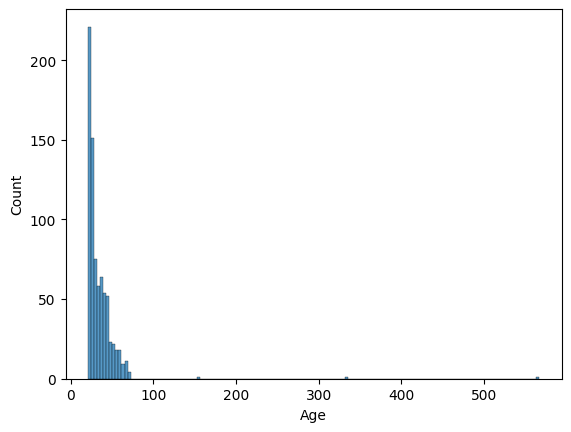

In [75]:
sns.histplot(data['Age'])

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

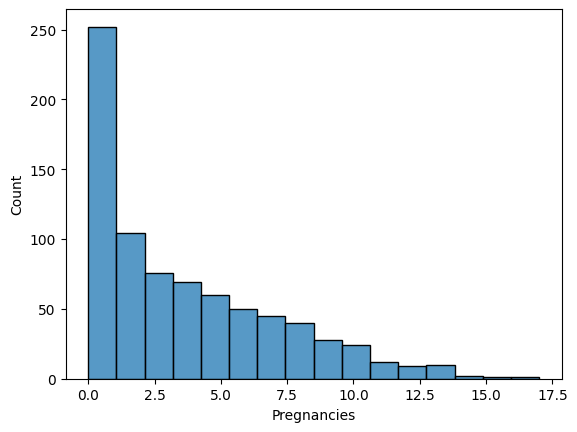

In [76]:
sns.histplot(data['Pregnancies'])

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***


#### Missing Except for Glucose and DiabetesFunction that may be 0, no other data is likely to be 0. Hence, these are likely to be missing values. Among the missing value, the missing of skin thickness and insulin is most severe, counting over 200 of the dataset, and Insulin has almost half data missing. So, we need to either discard them or use mean to fill in the data. If there are too many data missing, it would be better to drop them


In [77]:
print('missing:')
(data == 0).sum()

missing:


Pregnancies                 113
Glucose                       5
BloodPressure                35
SkinThickness               232
Insulin                     380
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     510
dtype: int64


#### Duplicate There are 15 duplicates in total. We need to remove them.


In [78]:
print('duplication:')
len(data)-len(data.drop_duplicates())

duplication:


15


#### Outlier It is always hard to find outliers. But we have some hints. For instance, it is unlikely for a human to live to 100 years old. Also, it is not likely for blood pressure to go crazy like 200. Hence, we first calculate a quantile and then see what data is too crazy. If there are outlier, they have to be either dropped or replaced with average value.
Let's use mean +/- 3 std to determine

In [79]:
print('outliers')
for attr in data:
    mask=data[attr].between(data[attr].mean() - 3 * data[attr].std(),data[attr].mean() + 3 * data[attr].std())
    print(attr,len(data[~mask]))
    

outliers
Pregnancies 4
Glucose 5
BloodPressure 3
SkinThickness 3
Insulin 20
BMI 2
DiabetesPedigreeFunction 12
Age 3
Outcome 0


***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

By taking a look to correlations between attributes, we can discover that there is a higher relationship between Insulin and SkinThickness. There is a weaker relationship between Insulin and Glucose, and Age and Pregnancies --- this makes sense, you have to grow up to give birth to more babies.

<AxesSubplot: >

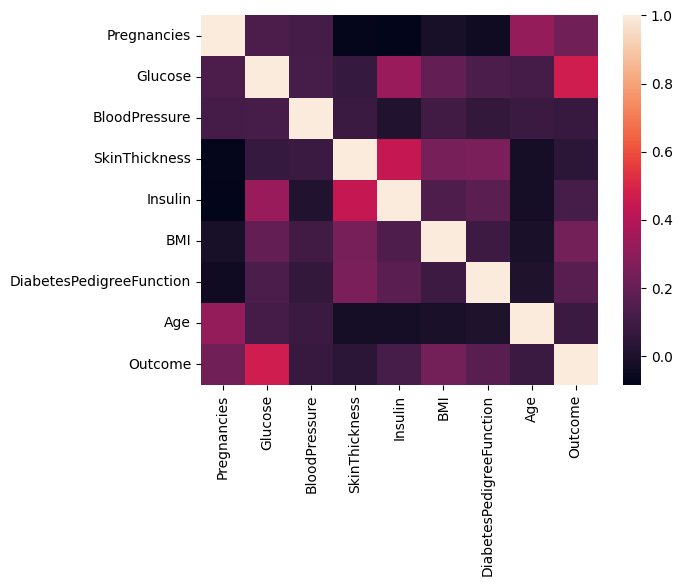

In [11]:
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)


So, when Insulin grows, the Glucose measures more on average.

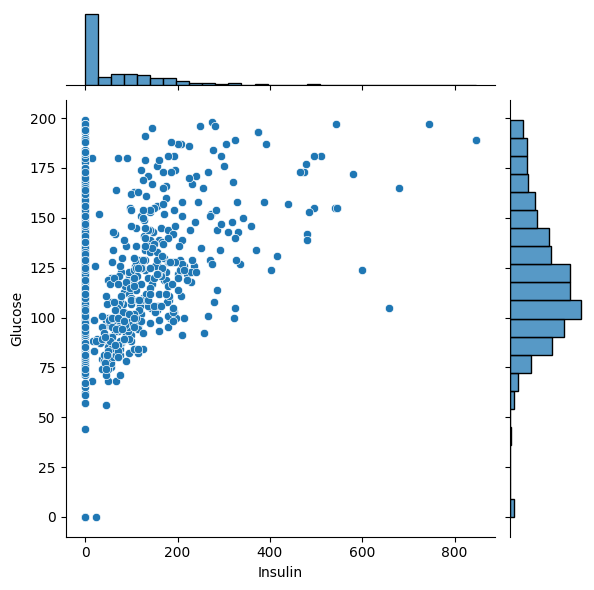

In [12]:
sns.jointplot(x='Insulin',y='Glucose',data=data);

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 
***
In earlier heatmap, the Outcome seem to be very related to Glucose, and as shown in table below, Glucose has 5e-12, which means diabete cases do relate highly to Glucose level. Moreover, Pregnancies, SkinThickness, Insulin, BMI, and Age appear to be related more or less to Diabete within 5%, whereas Glucose has a best  p-value.

In [13]:
for attr in data:
    if attr=='Outcome':
        continue
    q=pd.crosstab(data[attr],data['Outcome'])
    c, p, dof, expected=chi2_contingency(q)
    print(attr,"\t\t\t\t",p)

Pregnancies 				 1.6170411565670745e-08
Glucose 				 5.685263288325823e-12
BloodPressure 				 0.18419089744095898
SkinThickness 				 0.01651341756572851
Insulin 				 0.009032849901904023
BMI 				 0.022390523188369173
DiabetesPedigreeFunction 				 0.19946740419985695
Age 				 5.365748190578946e-11


***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How any duplicate records are were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***
#### How any duplicate records are were there? 
There are 15 duplicated rows, so these duplicated will be removed along with missing ones.

#### Why would we want to change it to the median value as opposed to the mean?
Because we still want to preseve the data point and mean is a computed value not a real value. Median is instead a real value that do not affect the validity of data
#### Bonus points


In [14]:
data[data.duplicated()]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8.0,188,78.0,0.0,0.0,47.9,0.137,43.0,1
226,11.0,143,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5.0,117,92.0,0.0,0.0,34.1,0.337,38.0,0
408,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4.0,110,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1.0,121,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5.0,168,64.0,0.0,0.0,32.9,0.135,41.0,1
521,0.0,100,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2.0,100,64.0,23.0,0.0,29.7,0.368,21.0,0
576,1.0,193,50.0,16.0,375.0,25.9,0.655,24.0,0


In [ ]:
#### Outliers


In [71]:
data=data[~data.duplicated()]
def replace_outlier_with_median_within_group(dataframe,attribute):
    print('Outliers of',attr)
    m=dataframe[attribute].between(dataframe[attribute].quantile(0.05),dataframe[attribute].quantile(0.95)) # those non-outliers
    print(dataframe[~m][attribute])
    s = dataframe[m].groupby('Outcome')[attribute].median() #median of non-outliers
    dataframe.loc[~m, attribute] = dataframe['Outcome'].map(s)     # replace outliers according to non-outliers
    print('Change to')
    print(dataframe[~m][attribute])
def replace_attribute_with_mean_within_group(dataframe,attribute):
    m = dataframe[attribute] != 0          # those non-missing ones
    print(dataframe[~m][attribute])
    s = dataframe[m].groupby('Outcome')[attribute].mean() # mean of non-missing ones
    dataframe.loc[~m, attribute] = dataframe['Outcome'].map(s) #replace missing ones according to non-missing ones' means
    print(dataframe[~m][attribute])
    
for attr in data:
    replace_outlier_with_median_within_group(data,attr)

for attr in data:
    replace_attribute_with_mean_within_group(data,attr)
# for attr in data:
#     replace_attribute_with_mean_within_group

Outliers of Pregnancies
39     11.0
83     13.0
95     12.0
97     12.0
117    11.0
162    12.0
200    13.0
216    11.0
239    13.0
269    13.0
306    11.0
311    12.0
333    11.0
339    13.0
364    14.0
374    15.0
382    11.0
410    13.0
425    12.0
428    11.0
497    13.0
531    12.0
547    12.0
555    14.0
559    11.0
583    11.0
586    12.0
590    13.0
616    11.0
633    11.0
685    13.0
692    12.0
724    17.0
745    13.0
Name: Pregnancies, dtype: float64
Change to
39     4.0
83     2.0
95     4.0
97     2.0
117    4.0
162    2.0
200    4.0
216    4.0
239    2.0
269    2.0
306    4.0
311    4.0
333    4.0
339    2.0
364    4.0
374    4.0
382    2.0
410    4.0
425    2.0
428    2.0
497    2.0
531    4.0
547    4.0
555    4.0
559    2.0
583    4.0
586    2.0
590    4.0
616    2.0
633    4.0
685    4.0
692    2.0
724    4.0
745    4.0
Name: Pregnancies, dtype: float64
Outliers of Glucose
7      189
51     189
62     194
75     191
85      74
      ... 
763     74
772    194
778     

Yes! Now we got rid of guys having blood pressure of 504, Hawks with skin thickness of 273, Giants with BMI 264, and guys over 500 years old.

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.440104,120.570312,71.457031,19.184896,58.700521,32.014583,0.430828,31.598958,0.348958
std,2.826409,24.496233,10.057759,14.364493,76.627586,5.292355,0.220045,9.588297,0.476951
min,0.000000,79.000000,40.000000,0.000000,0.000000,21.800000,0.141000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.175000,0.259000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,0.000000,31.750000,0.365000,28.000000,0.000000
75%,5.000000,135.000000,78.000000,31.000000,106.500000,35.500000,0.561750,38.000000,1.000000
max,10.000000,181.000000,92.000000,44.000000,300.000000,44.500000,1.127000,58.000000,1.000000


Now, it is almost same, but some relations are stronger. The correlation between Pregnancy and Age became more strong, and There is a more clear rule between Skin thickness and Insulin, and Glucose and Pregnancy.

<AxesSubplot: >

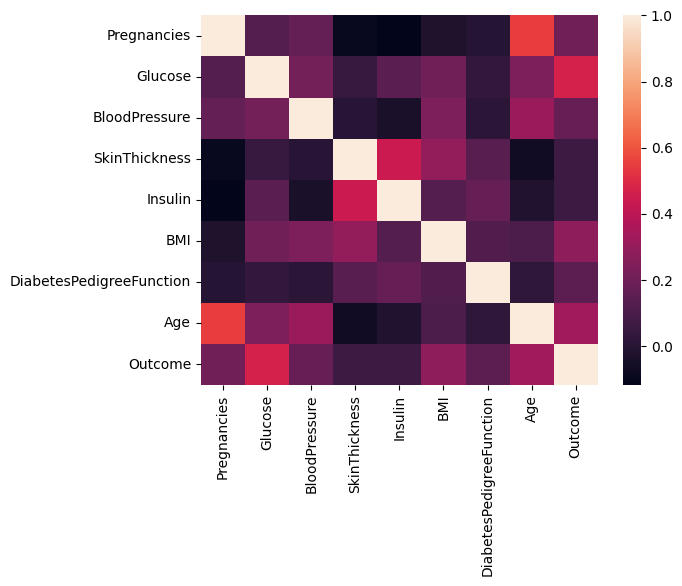

In [17]:
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

***
## Section: 3.2 - Did you decide to implement any freature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***
#### Model output and coefficients are:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome',axis=1), 
                                                    data['Outcome'], test_size=0.30)
logmodel = sm.Logit(y_train,X_train)

logmodel=logmodel.fit()
print(logmodel.summary())



Optimization terminated successfully.
         Current function value: 0.587969
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                 0.09969
Time:                        09:59:52   Log-Likelihood:                -315.74
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 1.531e-12
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0401      0.040      1.004      0.315      -0.038

#### What is odds ratio?

In [ ]:
import scipy.stats as stats
print(logmodel.params)
# for attr in ['Pregnancies','Glucose','BloodPressure','Age']:
np.exp(logmodel.params)

# oddsratio, pvalue = stats.fisher_exact(table)
# print(oddsratio)


#### Cutoff and misclassification tables

In [67]:
# preds_half=logmodel.predict(X_test)
# print(preds_half)
preds_half = np.where(logmodel.predict(X_test) > 0.5, 1, 0)
preds_quarter = np.where(logmodel.predict(X_test) > 0.75, 1, 0)


print("Misidentification-0.5",y_test != preds_half)
print("Misidentification-0.75",y_test != preds_quarter)


Misidentification-0.5 575     True
712     True
5      False
386    False
74     False
       ...  
158     True
404    False
197    False
452     True
6       True
Name: Outcome, Length: 231, dtype: bool
Misidentification-0.75 575    False
712     True
5      False
386     True
74     False
       ...  
158     True
404    False
197    False
452    False
6       True
Name: Outcome, Length: 231, dtype: bool


#### ROC Curve
True negative is the probability where negative results are predicted negative.
True positive is the probability where porisive results are predicted positive.
The Area Under the Curve (AUC) measures how good a model is, the closer to 1, the better the model is. It is 0.7... not quite good, as 0.5 will make a model bad because prediction is random.




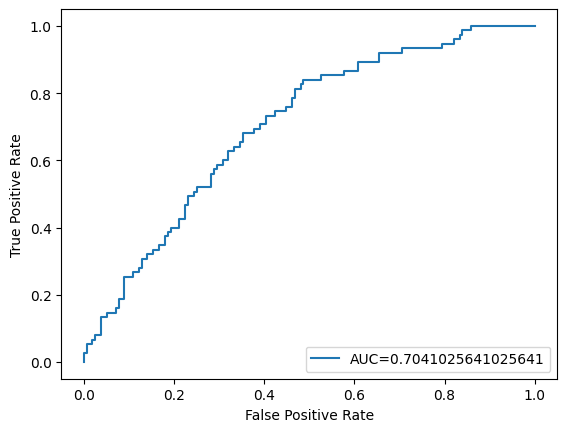

In [66]:
fpr, tpr, _ = metrics.roc_curve(y_test,  logmodel.predict(X_test))
auc = metrics.roc_auc_score(y_test, logmodel.predict(X_test))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***